In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from collections import Counter
import pprint

In [83]:
# generate hemoglobin data for patients
hemo_list = dict()

# generate chf patients' ids
chf_patients = list()

# generate all patients' ids
name_list = list()

# gemerate encounters of congestive heart failure
chf_list = dict()

for file in glob.glob('./data/*'):
    hemo_data = dict()
    chf_data = list()
    data = pd.read_json(file)
    count = data['entry'].count()
    name = data['entry'][0]['resource']['id']
    name_list.append(name)
    for i in range(count):
        if data['entry'][i]['resource']['resourceType'] == 'Observation':
            resource = data['entry'][i]['resource']
            if resource['code']['coding'][0]['code'] == '718-7':
                time = resource['effectiveDateTime'][0:10]
                value = resource['valueQuantity']['value']
                hemo_data[time] = value
        if data['entry'][i]['resource']['resourceType'] == 'Encounter':
            resource = data['entry'][i]['resource']
            if 'reasonCode' in resource:
                if resource['reasonCode'][0]['coding'][0]['code'] == '88805009':
                    time = resource['period']['start'][0:10]
                    chf_data.append(time)
                    if name not in chf_patients:
                        chf_patients.append(name)
                
    hemo_list[name] = hemo_data
    chf_list[name] = chf_data

In [84]:
# pprint.pprint(hemo_list)
# pprint.pprint('----------------------------------------')
# pprint.pprint(chf_list)

#### Distribution of average hemoglobin value of CHF patients:

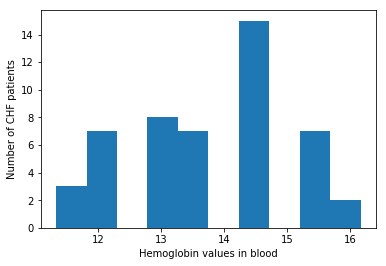

In [95]:
# avg value of people with chf
mean_list_chf = []
for person in chf_patients:
    values = hemo_list[person]
    list_chf = list(hemo_list[person].values())
    if len(list_chf) != 0:
        mean = sum(list_chf)/len(list_chf)
        mean_list_chf.append(mean)
df_chf = pd.DataFrame(mean_list_chf, columns=['Mean'])

plt.hist(mean_list_chf)
plt.xlabel('Hemoglobin values in blood')
plt.ylabel('Number of CHF patients')
plt.show()

#### Distribution of average hemoglobin value of non CHF patients:

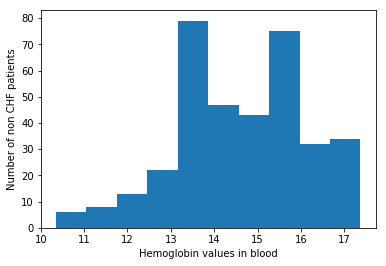

In [96]:
# avg value of people w/o chf
mean_list_nonchf = []
for person in name_list:
    if person not in chf_patients:
        values = hemo_list[person]
        list_nonchf = list(hemo_list[person].values())
        if len(list_nonchf) != 0:
            mean = sum(list_nonchf)/len(list_nonchf)
            mean_list_nonchf.append(mean)
df_nonchf = pd.DataFrame(mean_list_nonchf, columns=['Mean'])

plt.hist(mean_list_nonchf)
plt.xlabel('Hemoglobin values in blood')
plt.ylabel('Number of non CHF patients')
plt.show()